In [18]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

In [16]:
img = np.array([[1,2,3],
               [200,5,200],
               [7,8,9]
               ], dtype="float") #원하는 값을 보고 싶을 시 uint8 > float, uint8일시 일반적으로 0~255 사이의 수 출력
kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])
filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


In [15]:
cv2.imwrite("output.png", filtered.astype("uint8"))

True

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


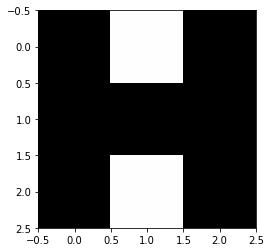

In [18]:
img = cv2.imread("output.png")
plt.imshow(img)
print(img)                  #-2를 2진수로 바꿀시 11111110(2), 254와 동일해짐, 올바르게 변환해주어야함

In [22]:
#min - max scaling (numpy) 2~0 ->  0~255
filter_scaled = (filtered - np.min(filtered)) / np.ptp(filtered)*255 #최대 최소 차이 반환 np.max() - np.min()
print(filter_scaled)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]


In [27]:
#min-max scaling (openCV)
norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
norm = norm.astype("uint8")
print(norm)

[[255   0 255]
 [255 255 255]
 [255   0 255]]


In [26]:
#absolute value scaling 0-2 ->  0 ~255
abs_value = np.abs(filtered)
filter_scaled_abs = abs_value / np.max(abs_value) * 255
print(filter_scaled_abs)

[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]


In [7]:
src = cv2.imread("AmandaSeyfried.jpg", cv2.IMREAD_GRAYSCALE)
src2 = src.astype("int16")

In [8]:
kernel = np.array([[0,+1,0],
                  [0,0,0],
                  [0,-1,0]])

filtered = cv2.filter2D(src2, -1 ,kernel)

print(np.min(filtered))
print(np.max(filtered)) #scaling 필요한지 확인

-225
228


In [11]:
cv2.imwrite("output_1.png", filtered)

True

<img src="output_1.png">

In [20]:
filtered_2 = cv2.filter2D(src2, -1 ,kernel) + 230
cv2.imwrite("output_2.png", filtered_2)

True

<img src="output_2.png">

In [16]:
filtered_3 = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
filtered_3 = filtered_3.astype("uint8")
cv2.imwrite("output_3.png", filtered_3)

True

<img src="output_3.png">

In [22]:
shape_test = cv2.imread("shape.png", cv2.IMREAD_GRAYSCALE)
filtered = cv2.filter2D(shape_test, -1 ,kernel)
cv2.imwrite("output_shape.png", filtered)

True

<img src="output_shape.png">

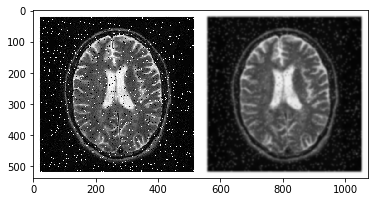

In [20]:
dirty_brain = cv2.imread("brain.jpeg")
gauss = cv2.GaussianBlur(dirty_brain, (15, 15), 0)
plt.imshow(np.hstack([dirty_brain, gauss]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


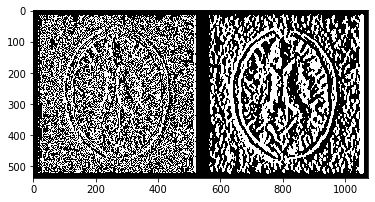

In [26]:
dirty_brain = cv2.imread("brain.jpeg")
sobel = cv2.Sobel(dirty_brain, cv2.CV_64F, 1, 0, ksize=3)
sobel2 = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)
plt.imshow(np.hstack([sobel, sobel2]))

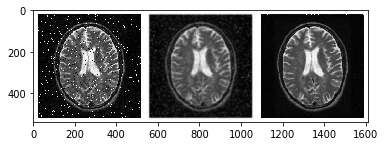

In [30]:
median = cv2.medianBlur(dirty_brain, 5)
plt.imshow(np.hstack([dirty_brain, gauss, median]))